## Estudo do Dataset Titanic - Jack não está morto

#### Carregando e exibindo os dados tais como suas estatísticas

In [2]:
import os
import sweetviz as sv
import numpy as np
import pandas as pd

df=pd.read_csv('./titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



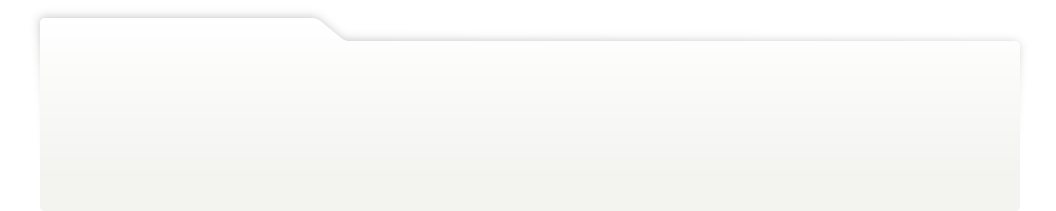
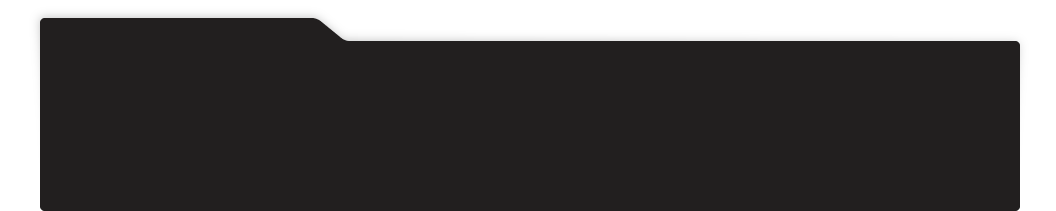
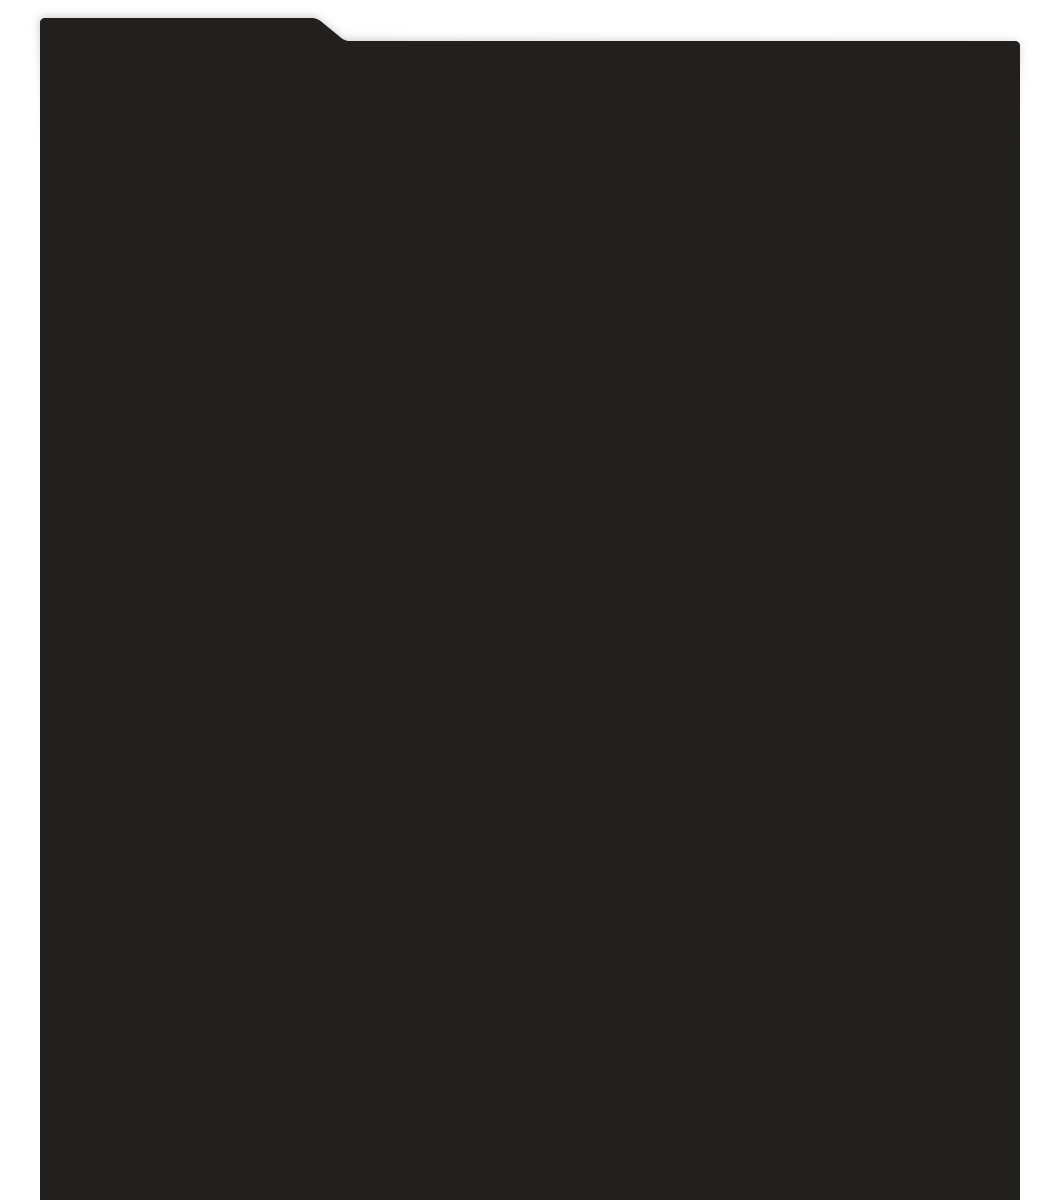
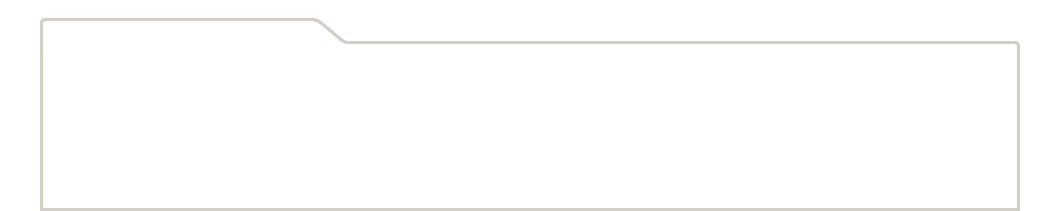
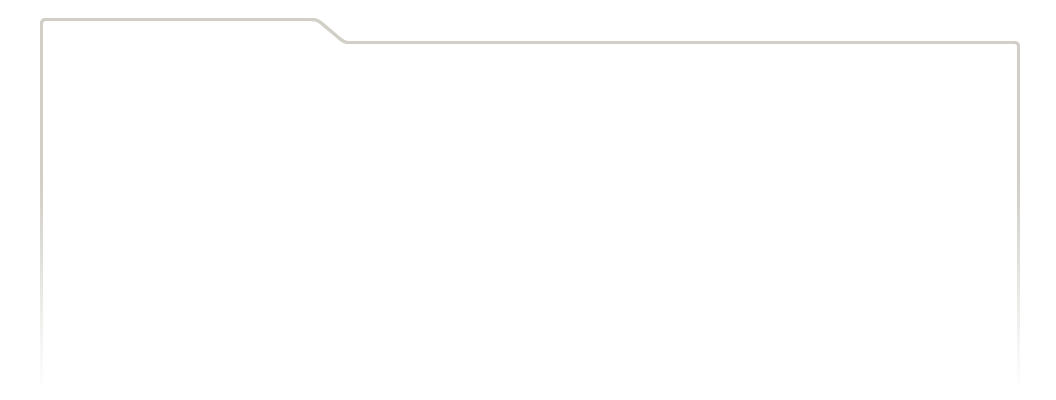
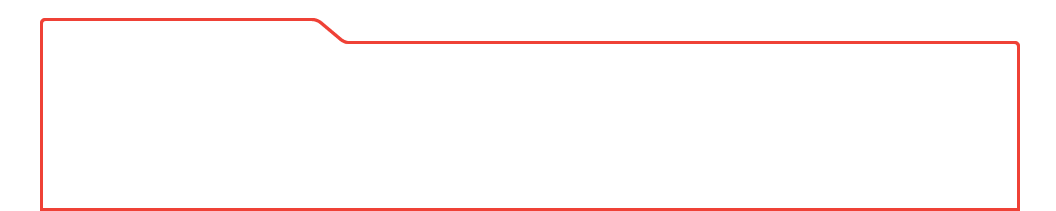
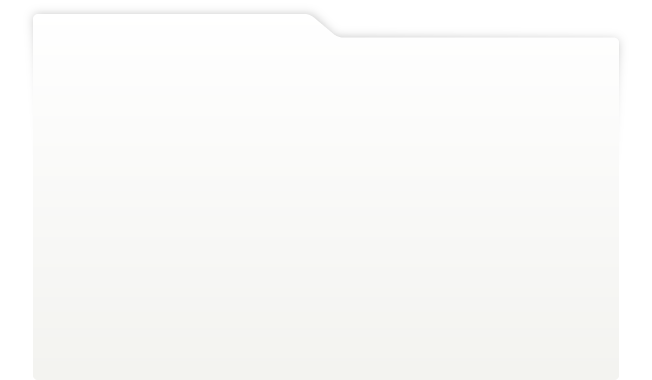
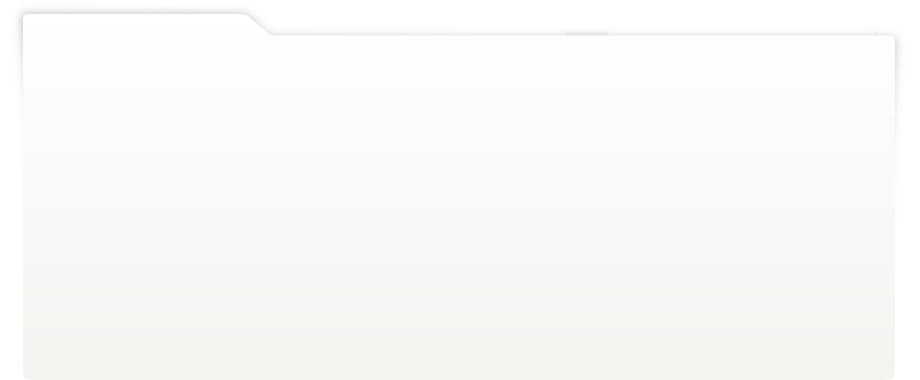
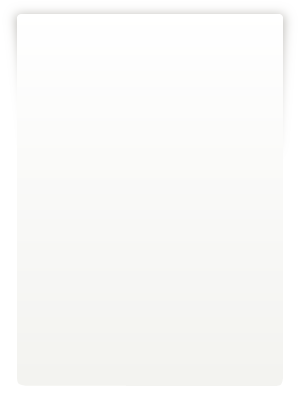
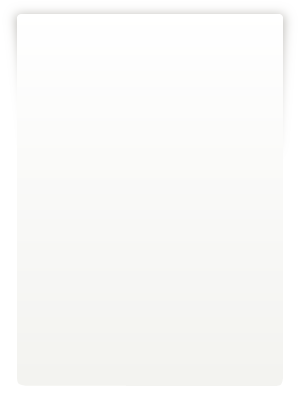
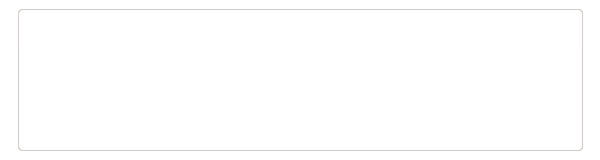
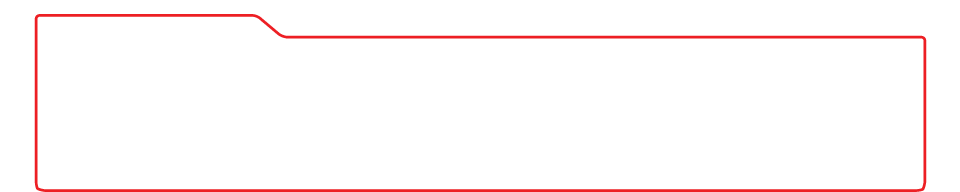
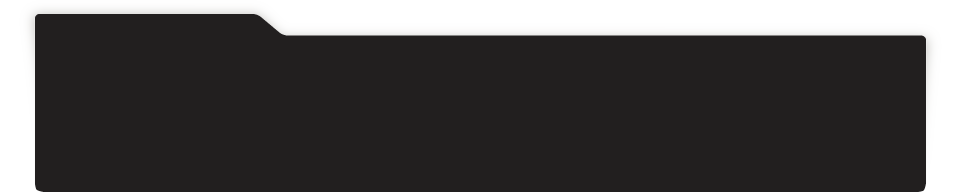
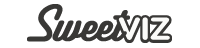
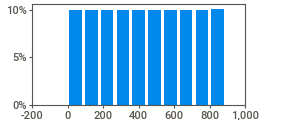
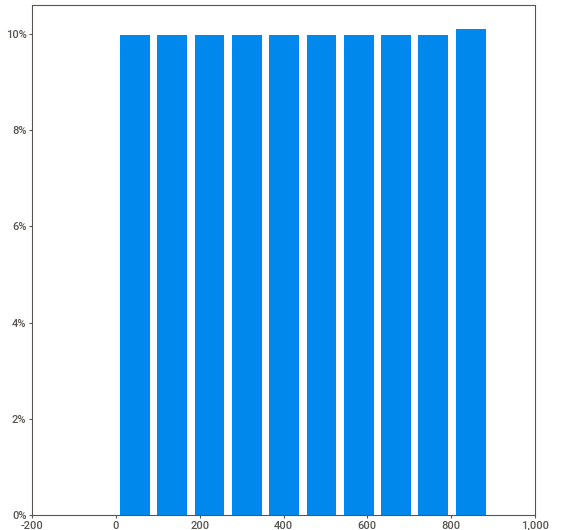
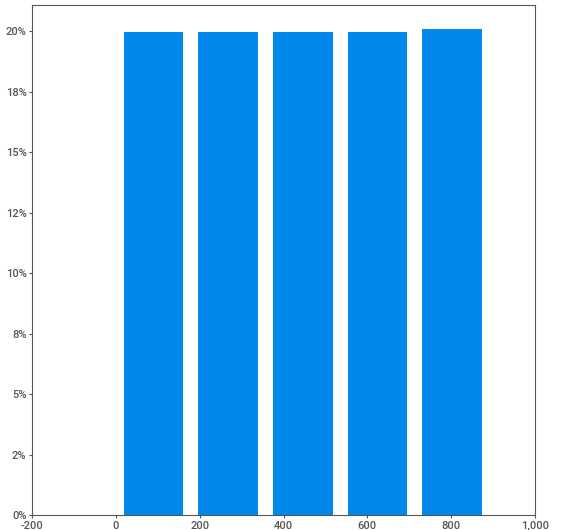
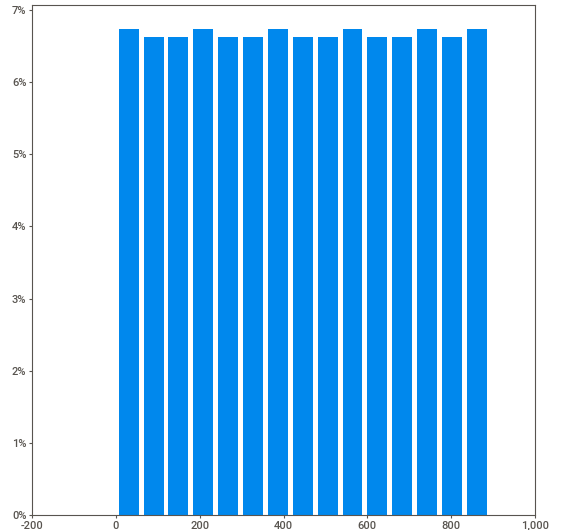
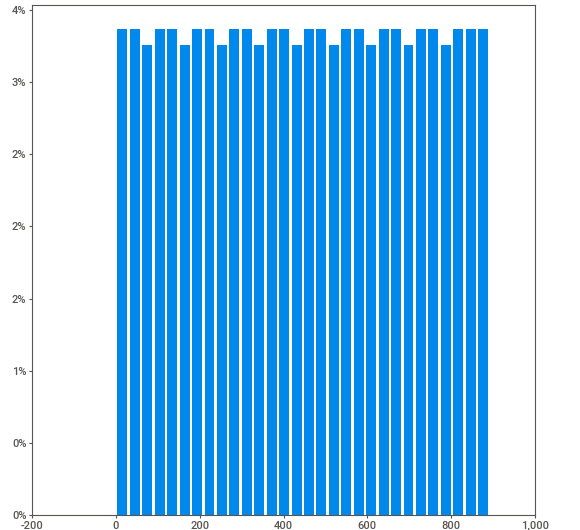
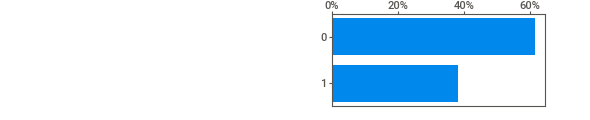
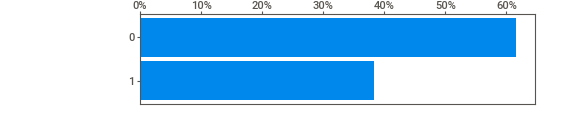
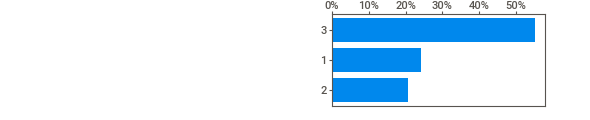
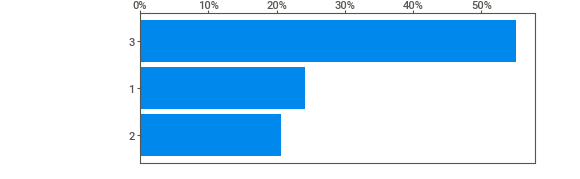
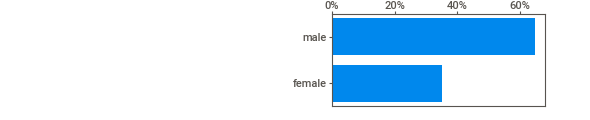
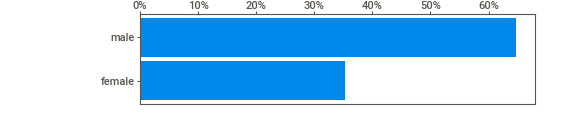
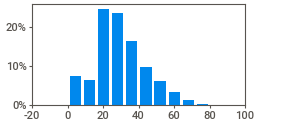
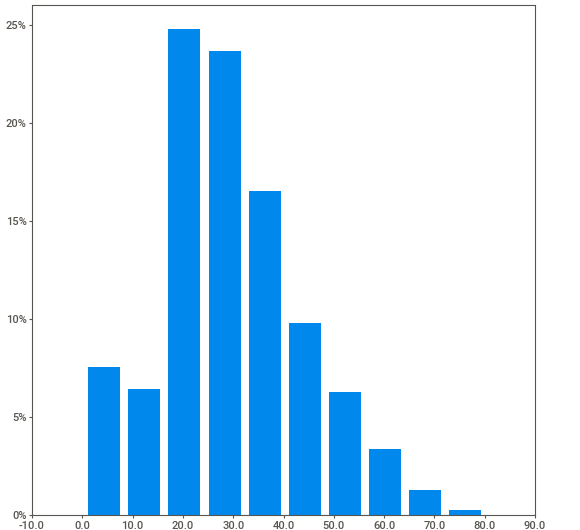
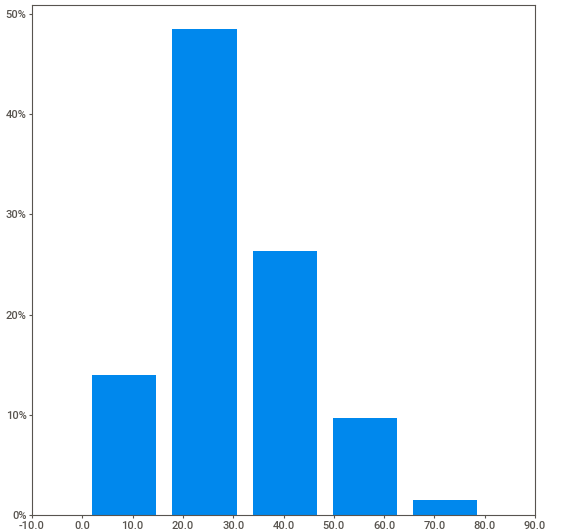
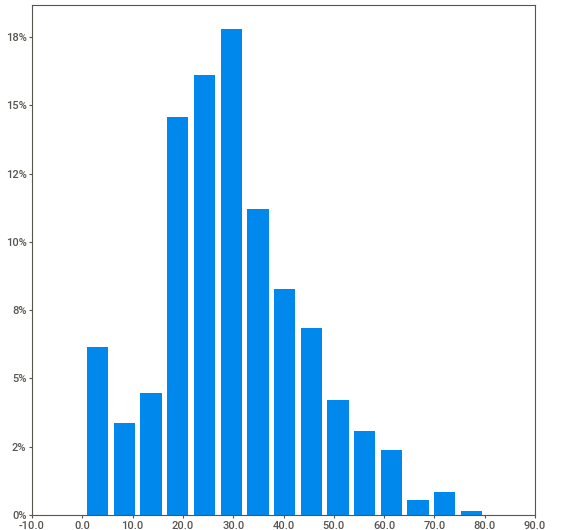
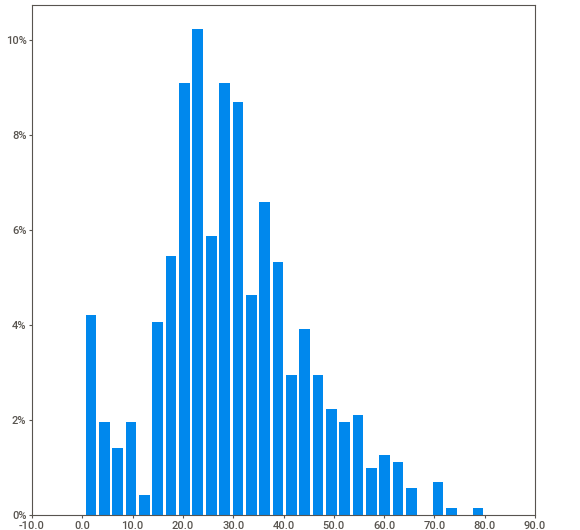
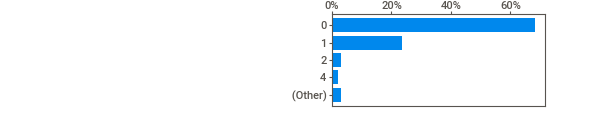
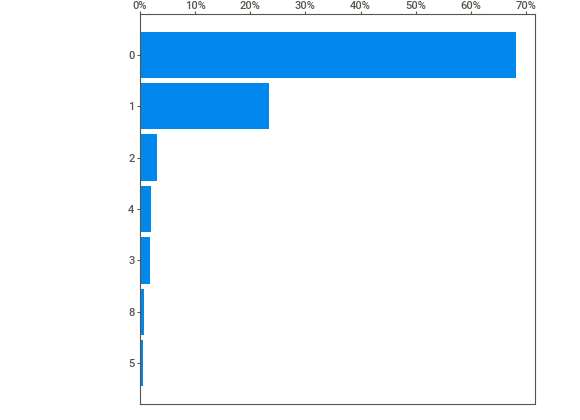
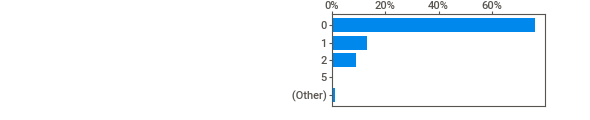
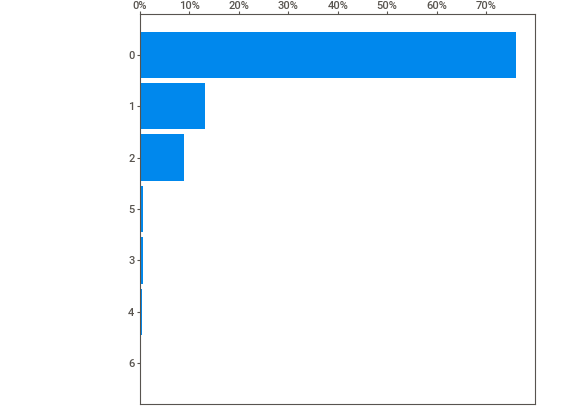
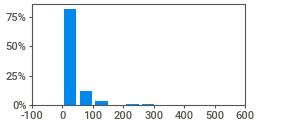
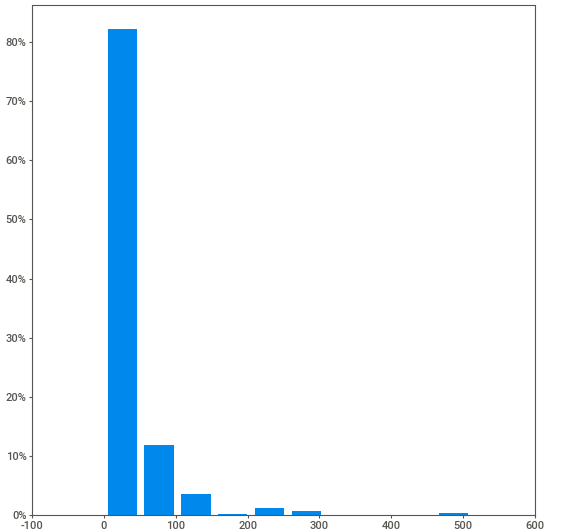
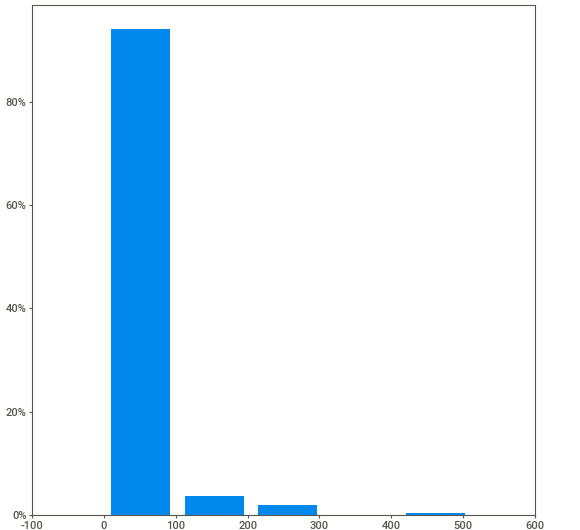
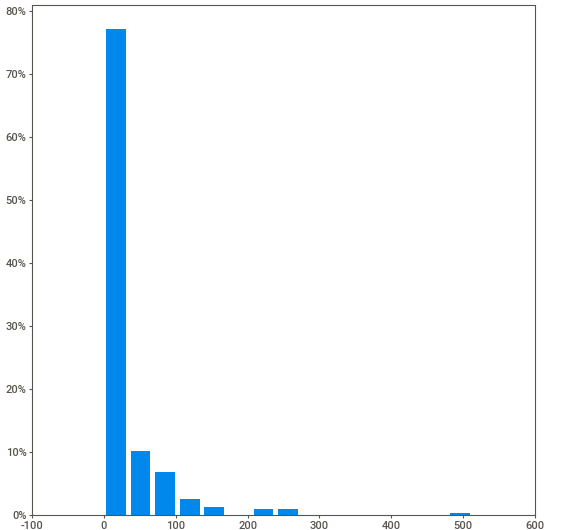
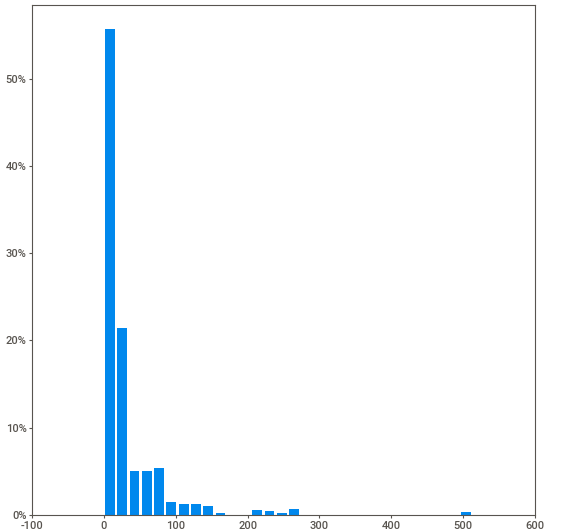
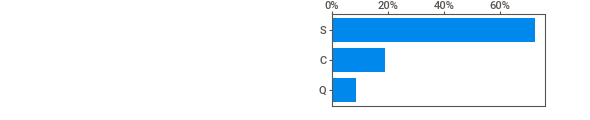
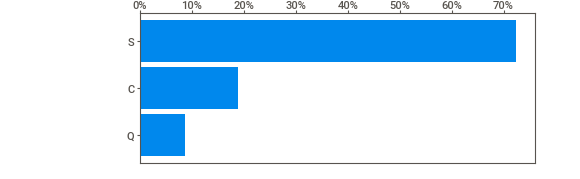
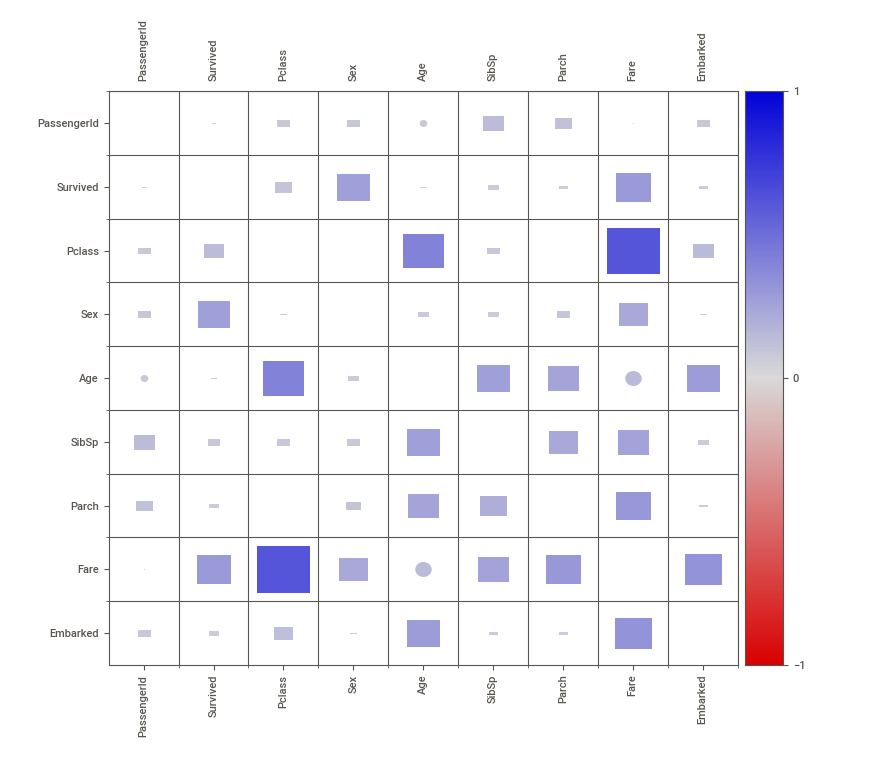
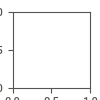

In [4]:
report = sv.analyze(df)
report.show_notebook(scale=0.7)

Colunas Cabin e Ticket não prestam, iremos dropá-las

Muitas idades faltando, uma forma de tentar inferir a idade talvez seja pelo pronome de tratamento, assim não precisaríamos dropar estes dados.

SibSp - Quantidade de irmãos/esposas juntos

Parch - Quantidade de filhos/pais juntos no navio

Embarked - Onde embarcou

Fare - valor pago pela tarifa (indicador de corrupção rs) mas pode ser associado à PClass tbm.

In [5]:
df["treatment"]=df.Name.str.replace('.', ',').str.split(',').str[1]
df["surname"]=df.Name.str.replace('.', ',').str.split(',').str[0]

In [6]:
df.treatment.groupby(df.treatment).count()

treatment
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: treatment, dtype: int64

In [7]:
miss = df[df.treatment.str.contains('Miss')]

In [8]:
mrs = df[df.treatment.str.contains('Mrs')]

<AxesSubplot:xlabel='Age'>

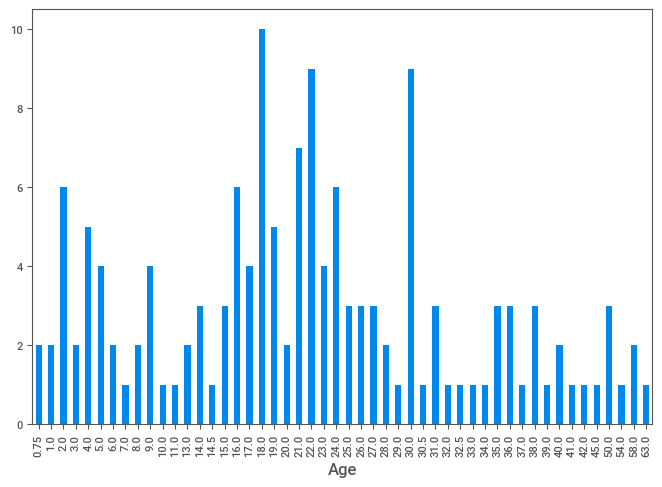

In [9]:
miss.Age.groupby(miss.Age).count().plot(kind='bar')

<AxesSubplot:xlabel='Age'>

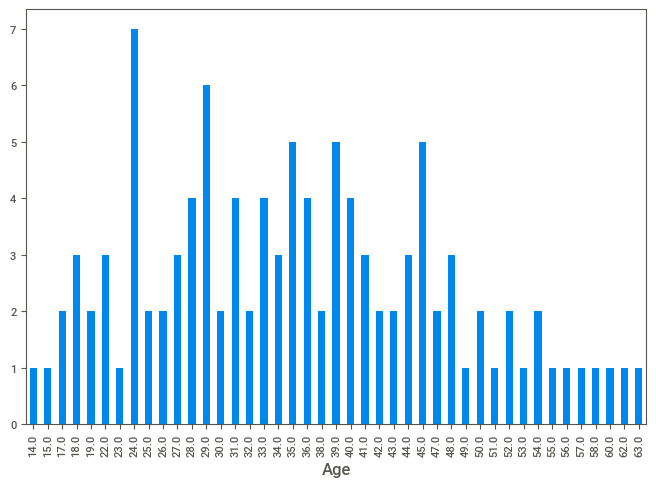

In [10]:
mrs.Age.groupby(mrs.Age).count().plot(kind='bar')

In [11]:
df_na = df[df.Age.isna()]

In [12]:
df_na.treatment.groupby(df_na.treatment).count()

treatment
 Dr          1
 Master      4
 Miss       36
 Mr        119
 Mrs        17
Name: treatment, dtype: int64

### Teste 1: Dropando os dados que não possuem idade

In [13]:
df['familia'] = df.SibSp + df.Parch
df['temCabine'] = df.Cabin.notnull().astype(int)
df = df.drop(columns=['Ticket','Cabin',"Name","PassengerId"])

In [14]:
df = df.dropna()


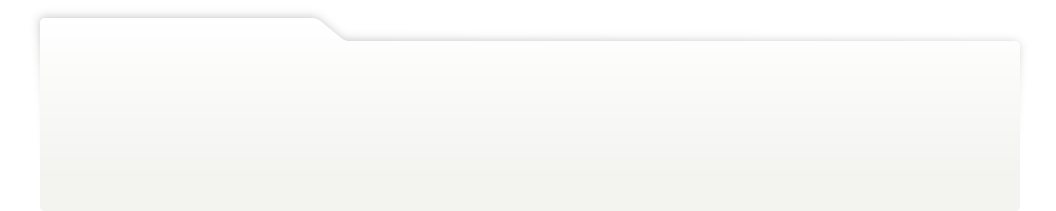
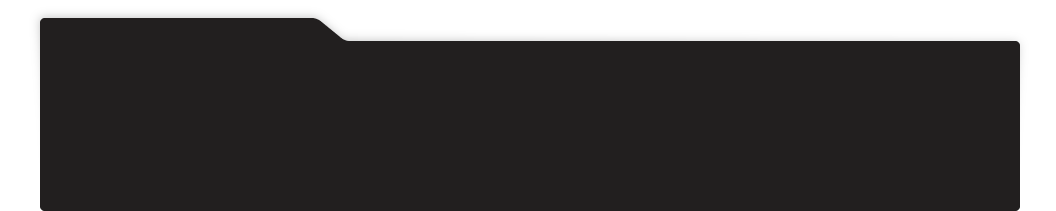
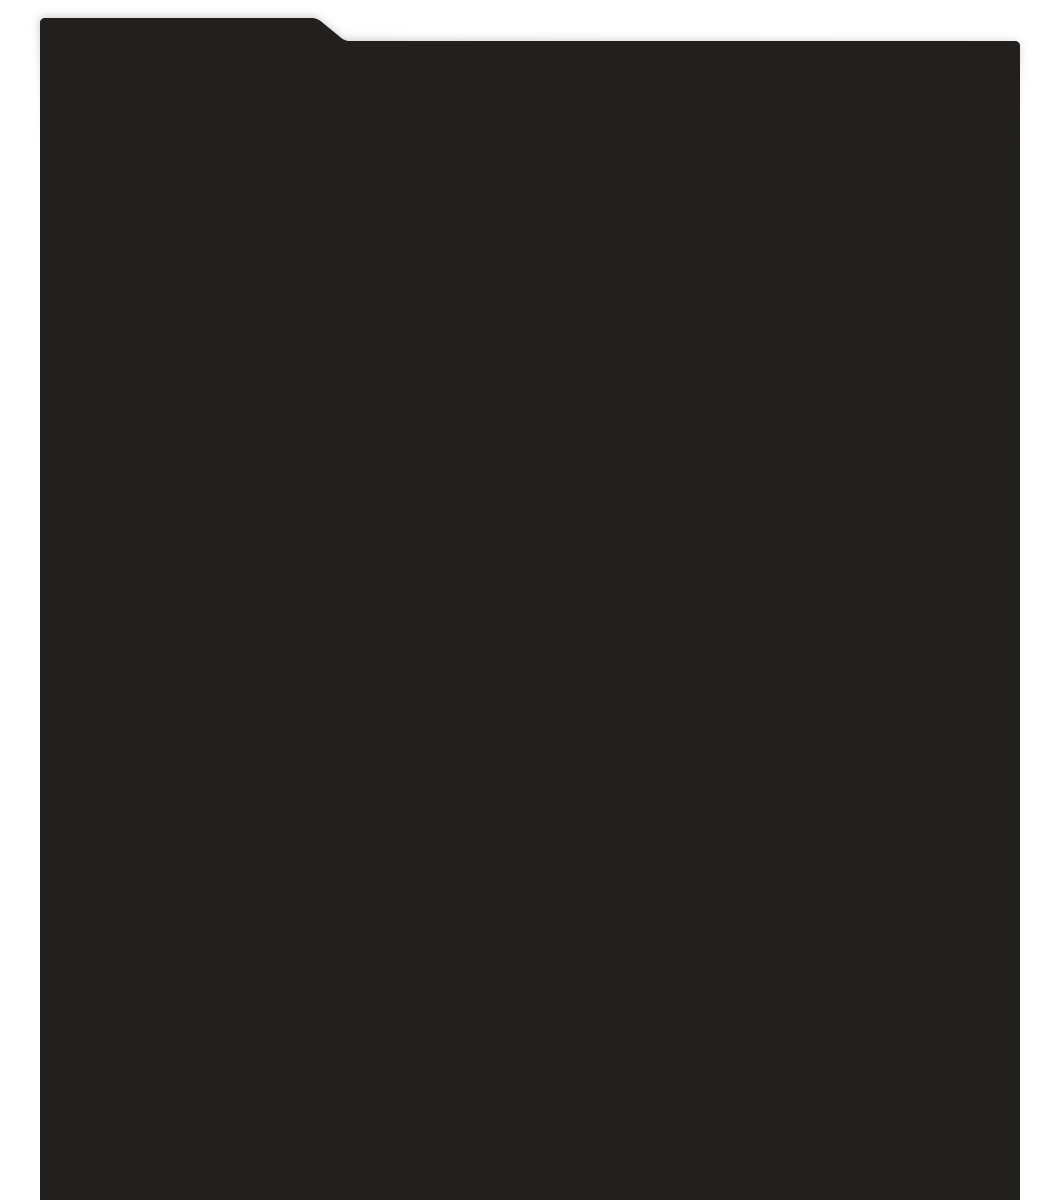
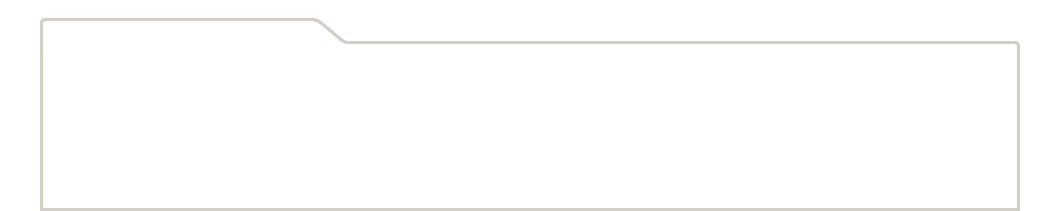
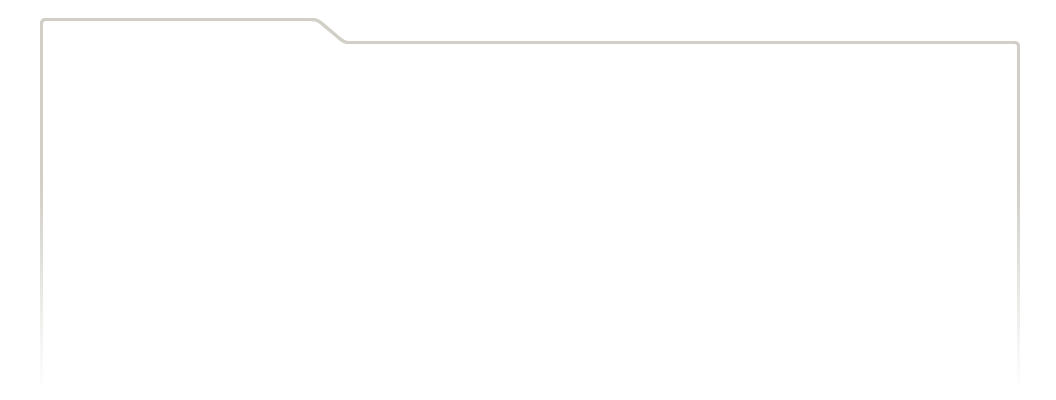
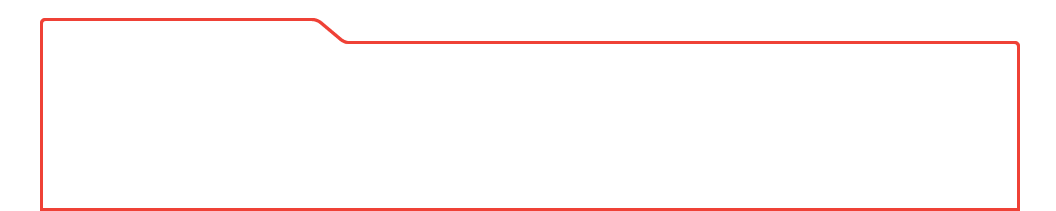
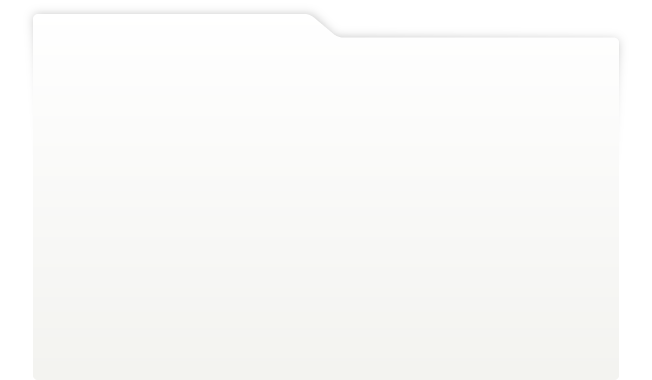
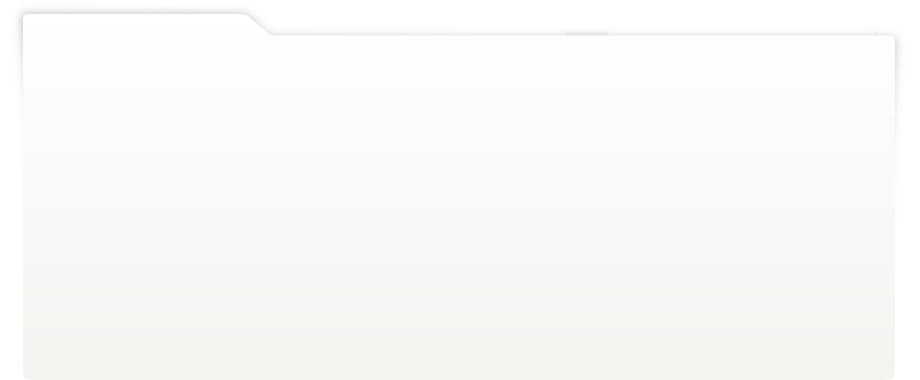
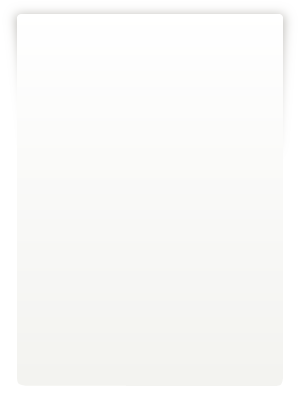
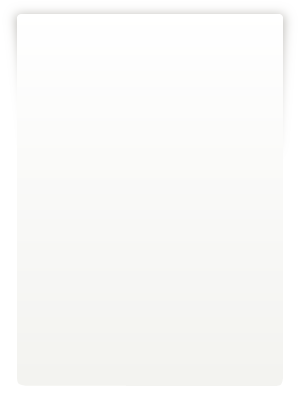
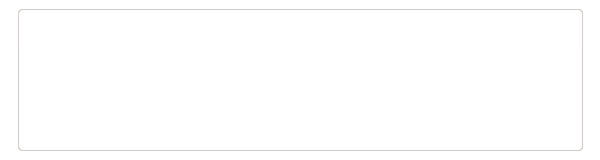
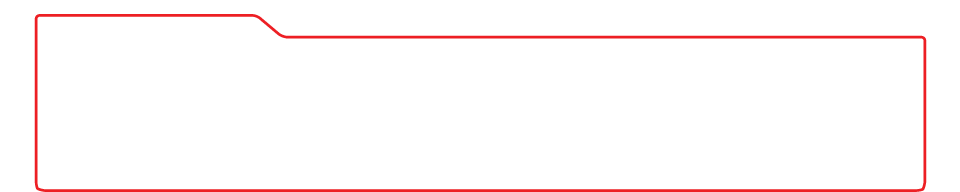
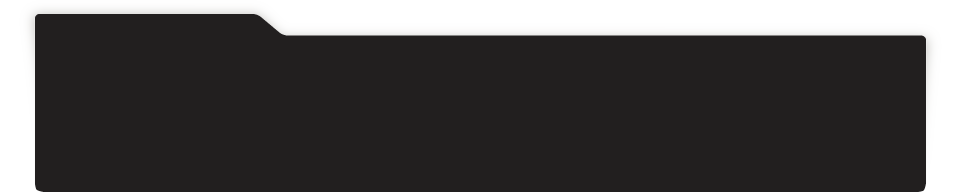
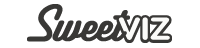
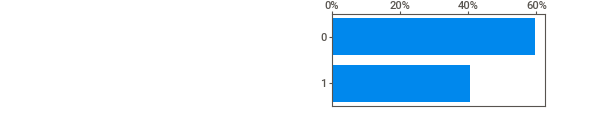
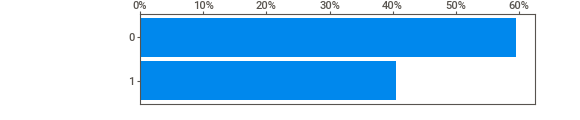
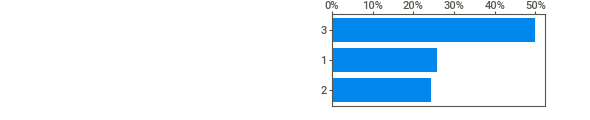
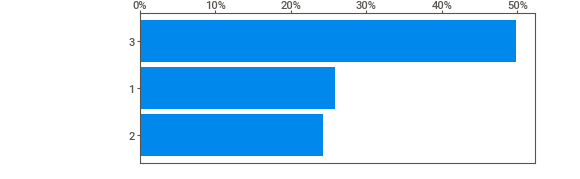
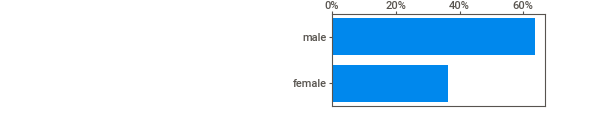
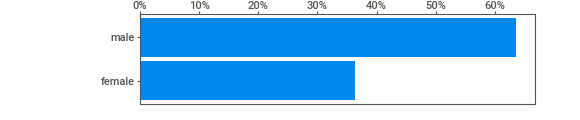
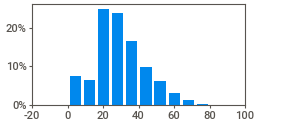
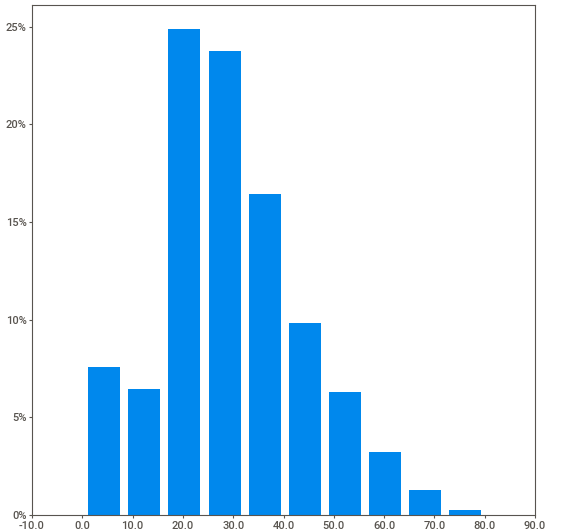
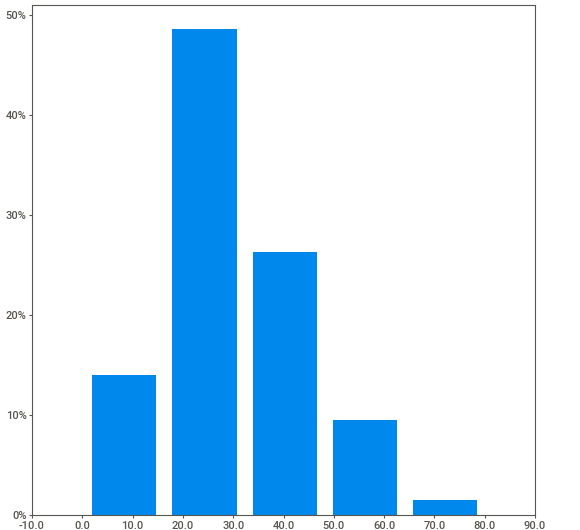
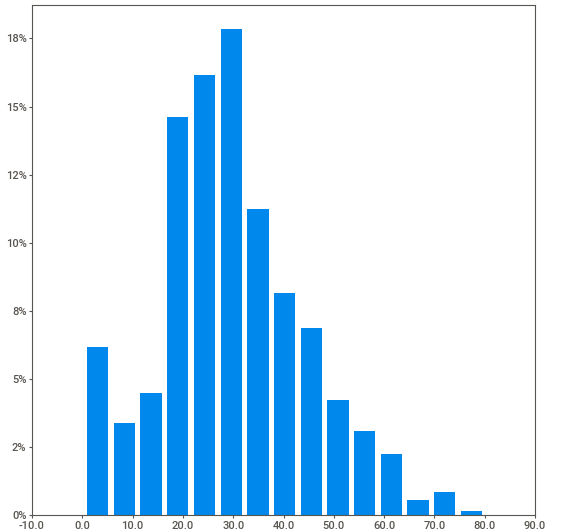
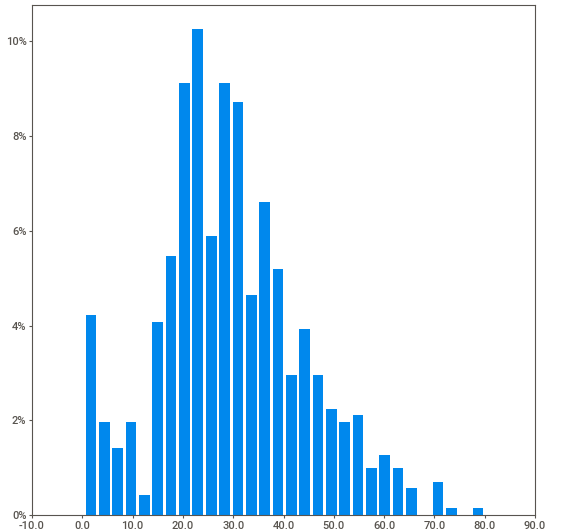
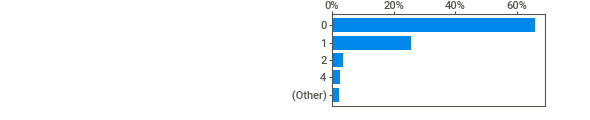
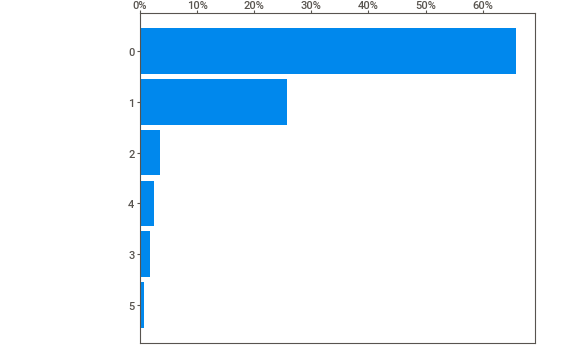
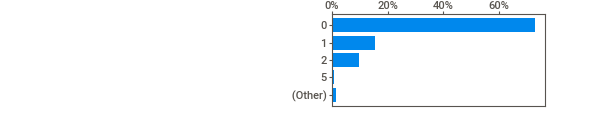
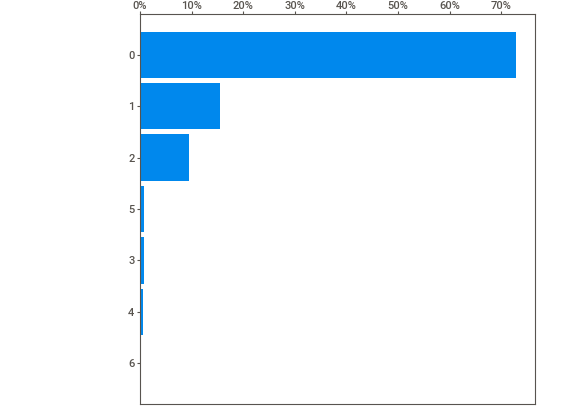
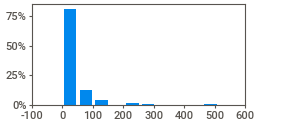
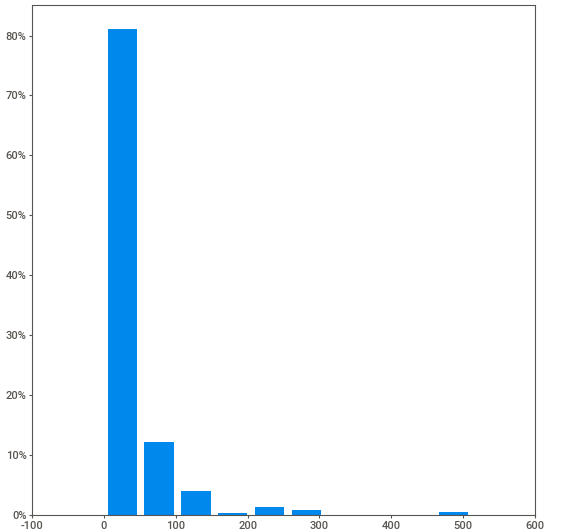
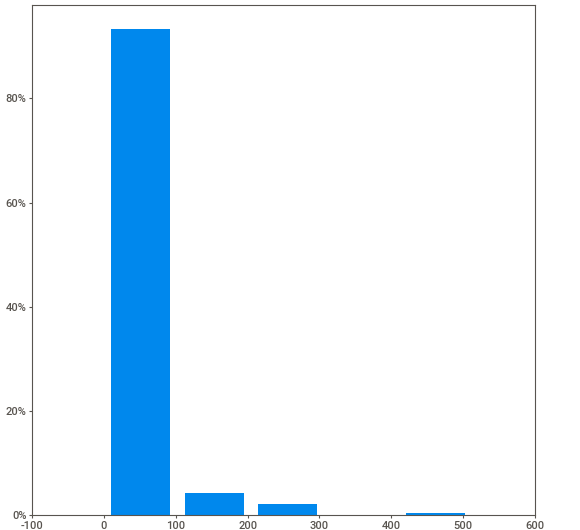
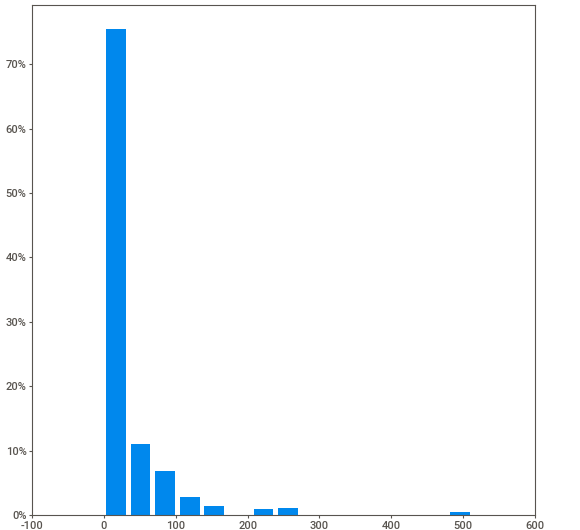
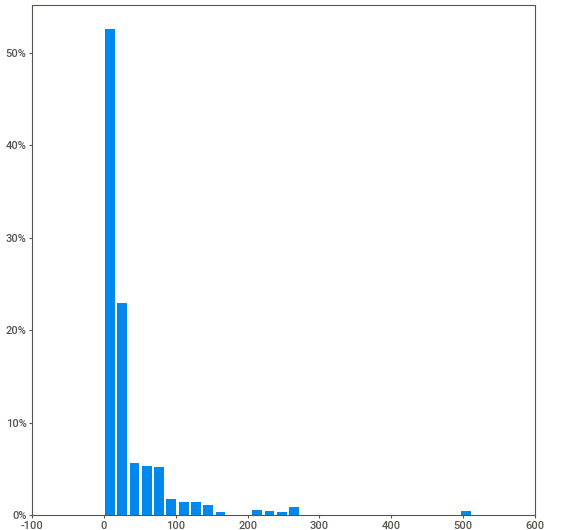
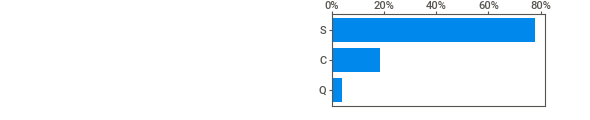
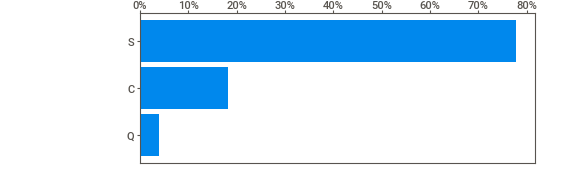
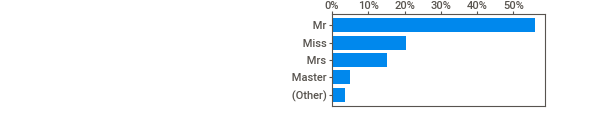
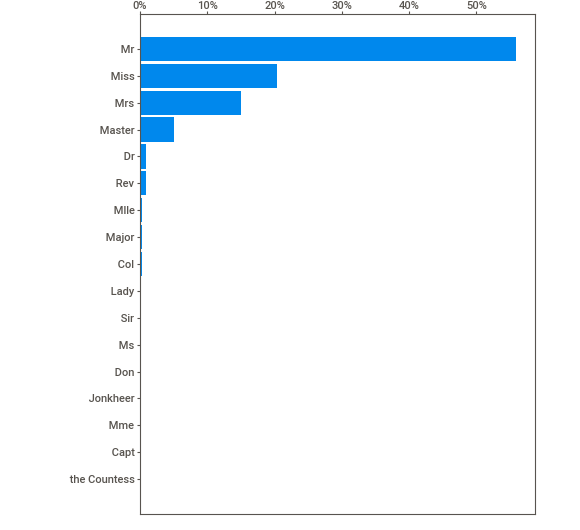
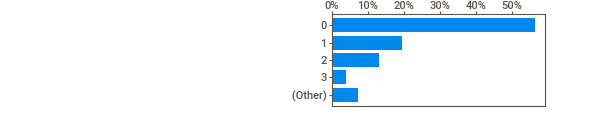
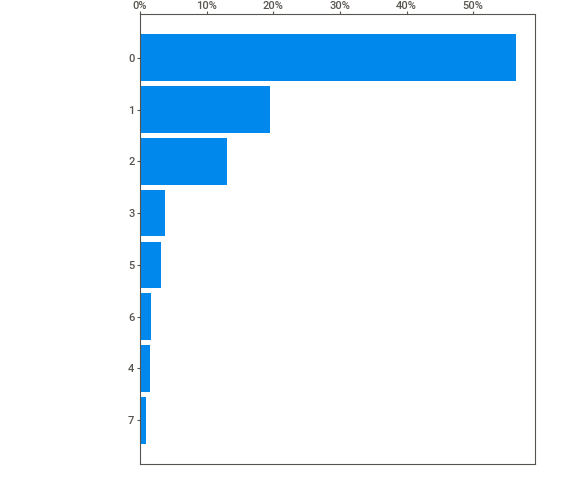
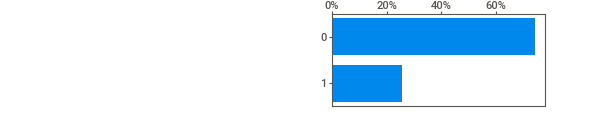
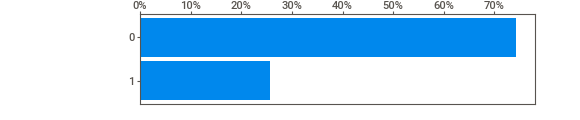
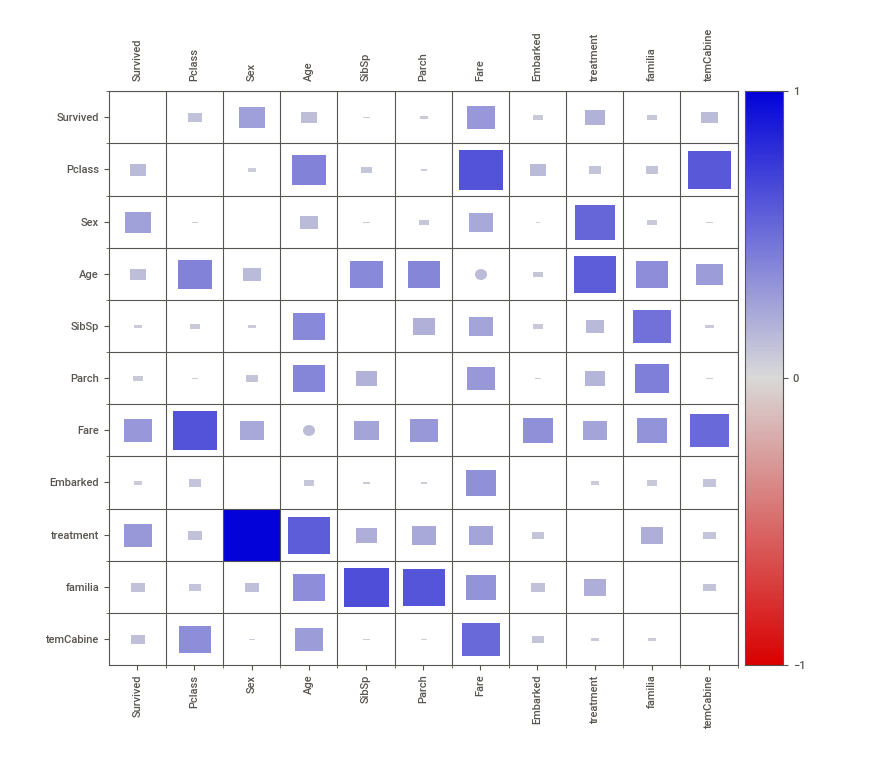
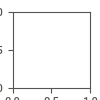

In [15]:
report = sv.analyze(df)
report.show_notebook(scale=0.7)

### Dropando colunas redundantes

In [16]:
df = df.drop(columns=['surname','SibSp',"Parch"])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = df["Survived"]

X = pd.get_dummies(df.drop(columns="Survived"))
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
model = RandomForestClassifier(n_estimators=300, max_depth=3,random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

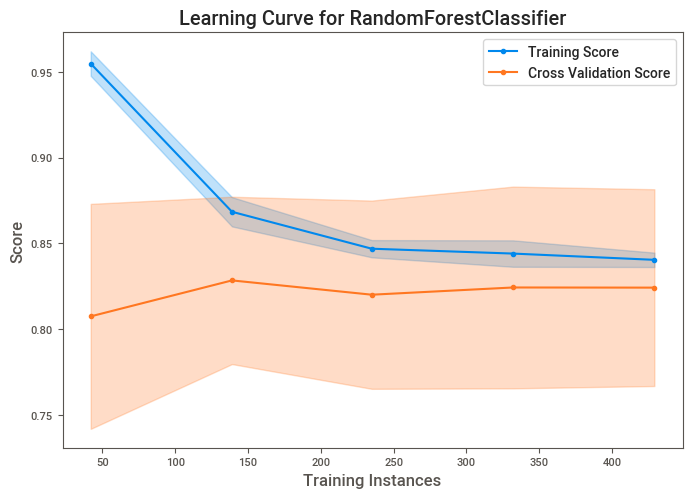

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
print(learning_curve(model, X_train, y_train, cv=10, scoring='accuracy'))

In [20]:
accuracy_score(predictions,y_test)

0.7404255319148936

In [21]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(predictions, y_test)
confusion_matrix = confusion_matrix.astype(int)

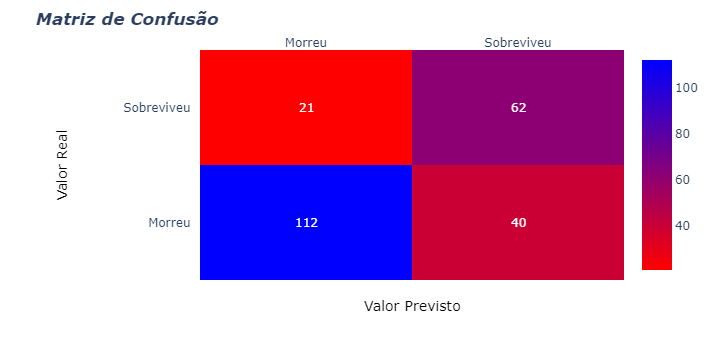

In [24]:
import plotly.figure_factory as ff
def plot_confusion_matrix(z):
    x = ['Morreu','Sobreviveu']
    y =  ['Morreu','Sobreviveu']

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Bluered_r')

    # add title
    fig.update_layout(title_text='<i><b>Matriz de Confusão</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Valor Previsto",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Valor Real",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
plot_confusion_matrix(confusion_matrix)

### Testando agora sem dropar as idades nulas

In [25]:
df=pd.read_csv('./titanic/train.csv')
df["treatment"]=df.Name.str.replace('.', ',').str.split(',').str[1]
df['familia'] = df.SibSp + df.Parch
df['temCabine'] = df.Cabin.notnull().astype(int)
df = df.drop(columns=['Ticket','Cabin',"Name","PassengerId"])
df = df.fillna(df.mean())

In [27]:
df = df.dropna()


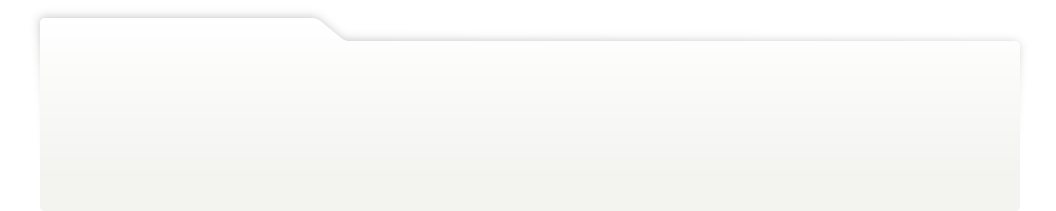
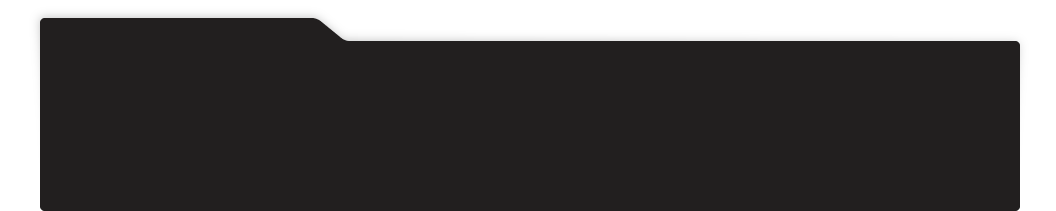
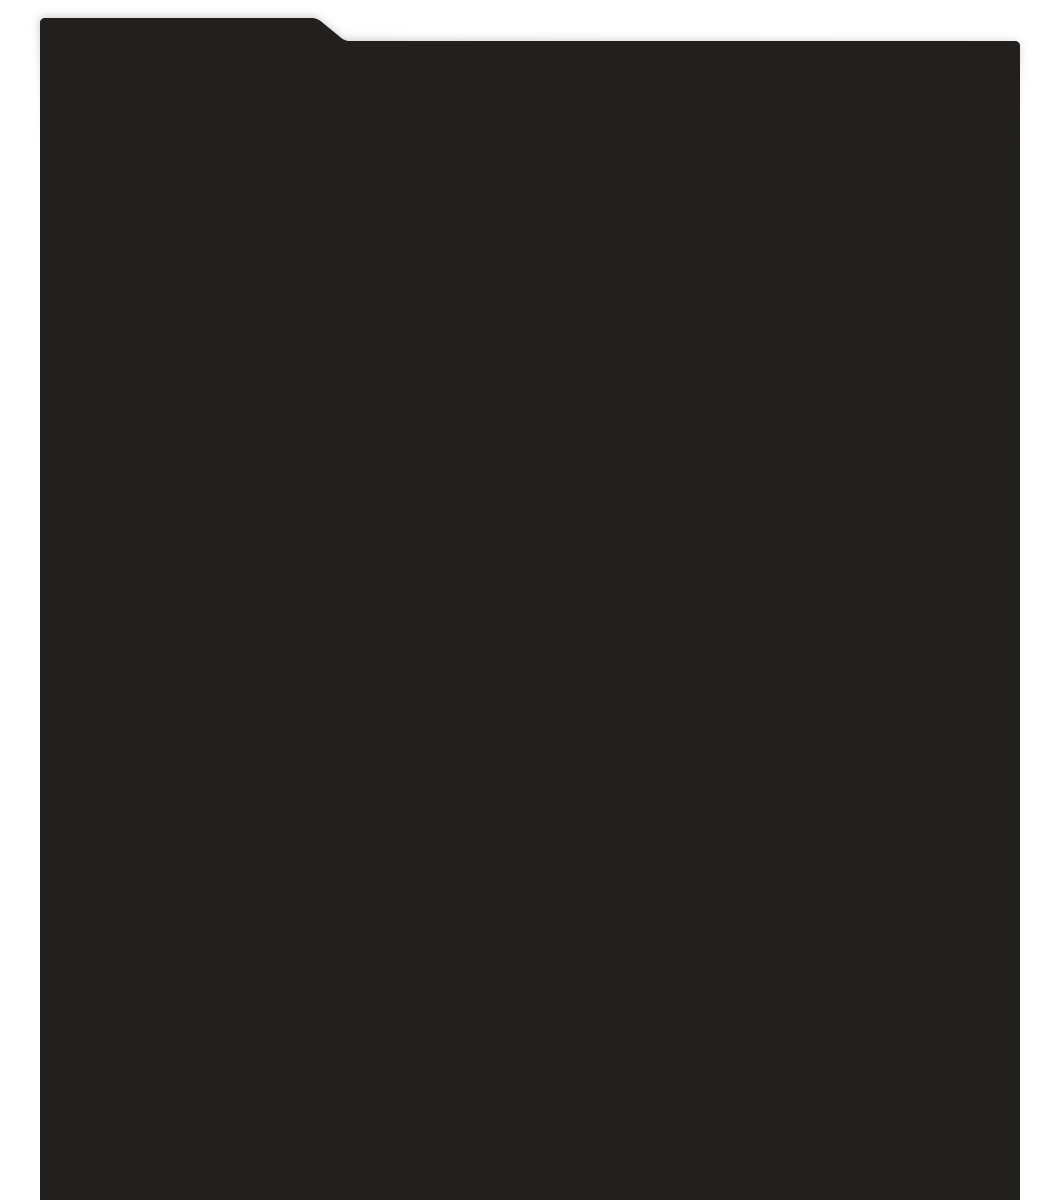
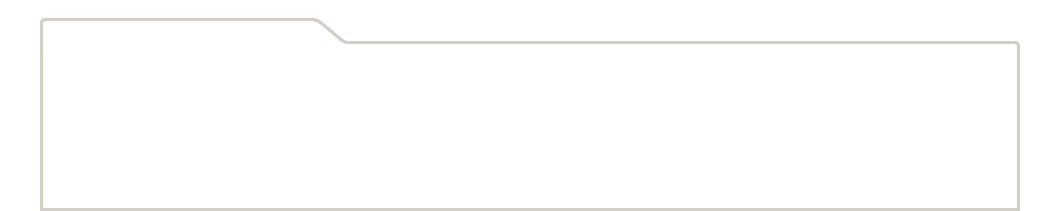
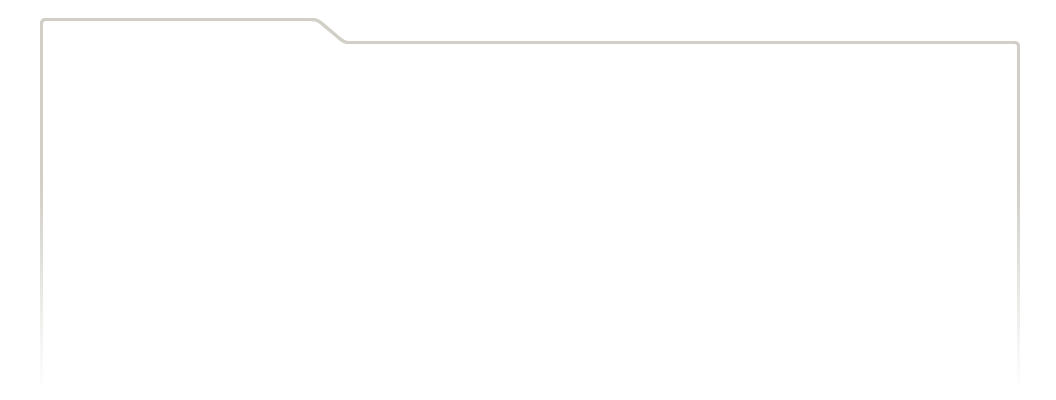
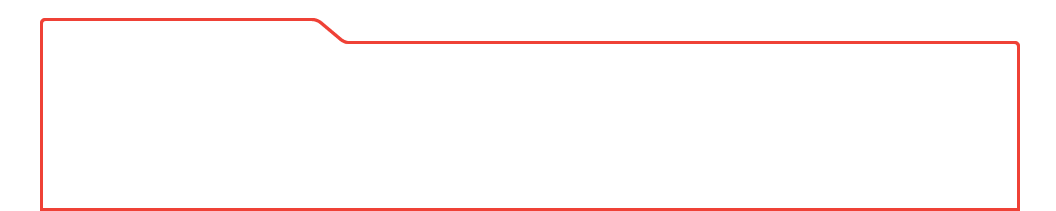
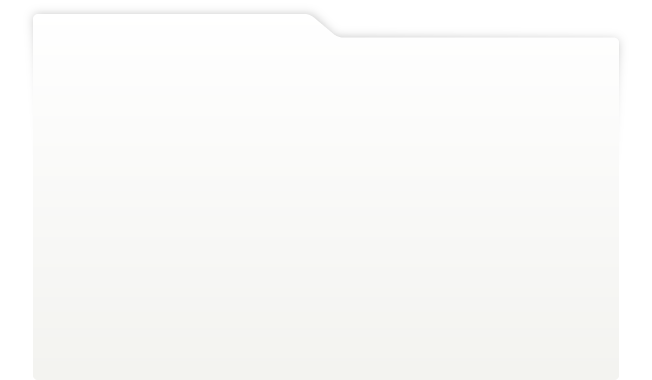
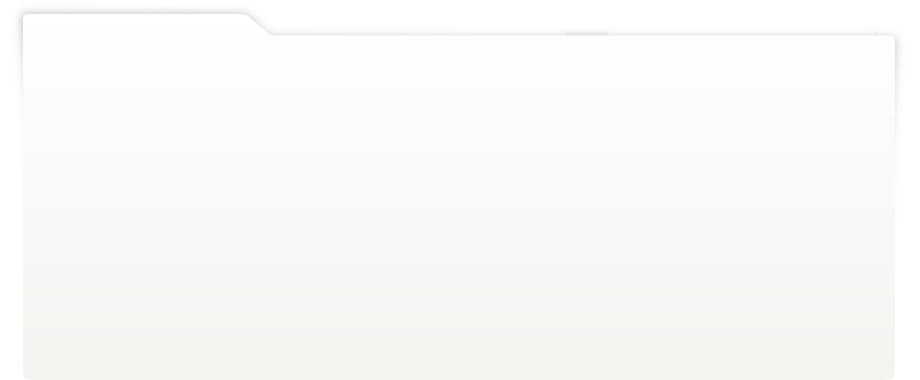
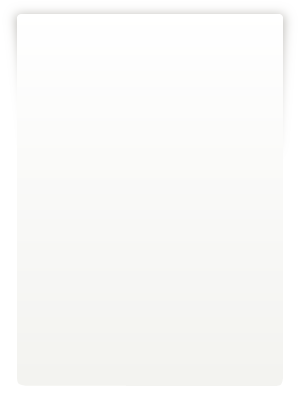
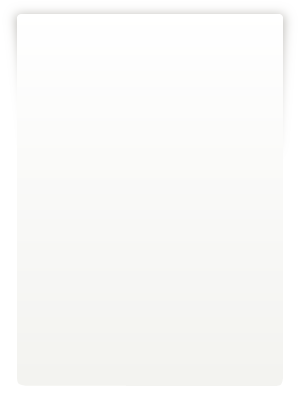
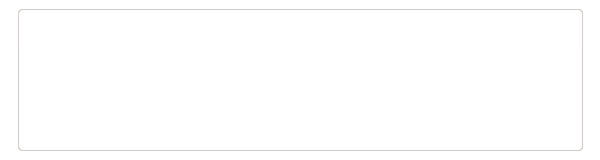
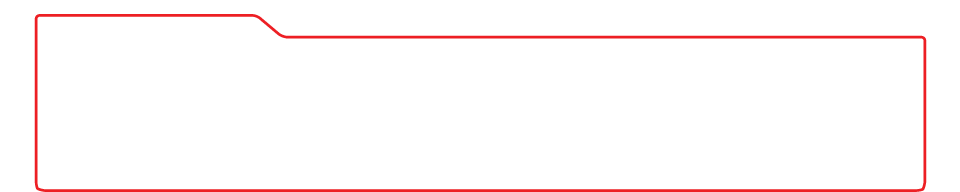
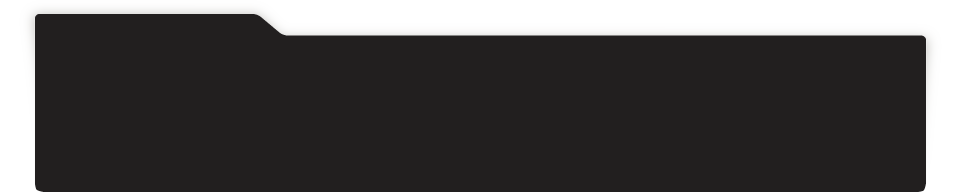
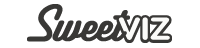
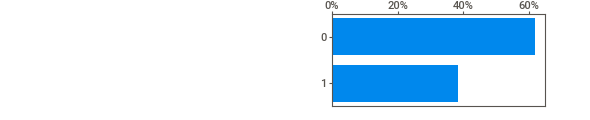
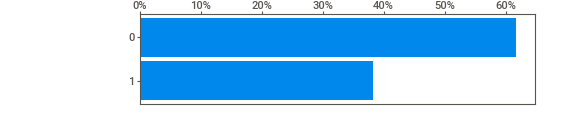
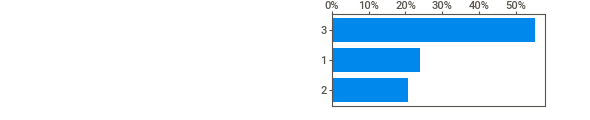
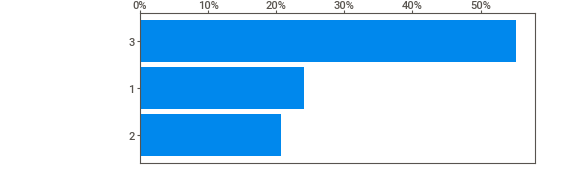
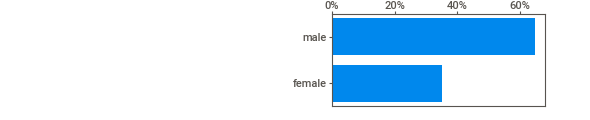
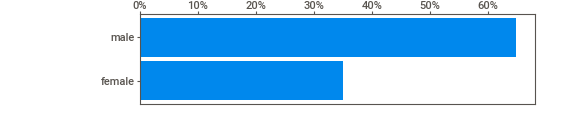
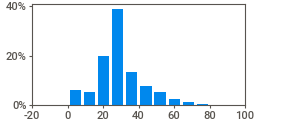
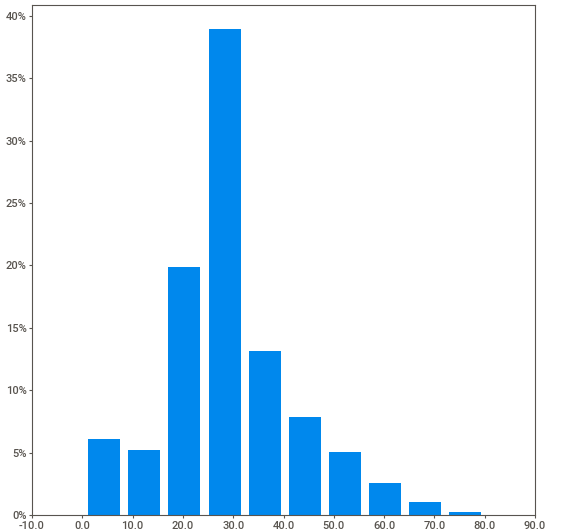
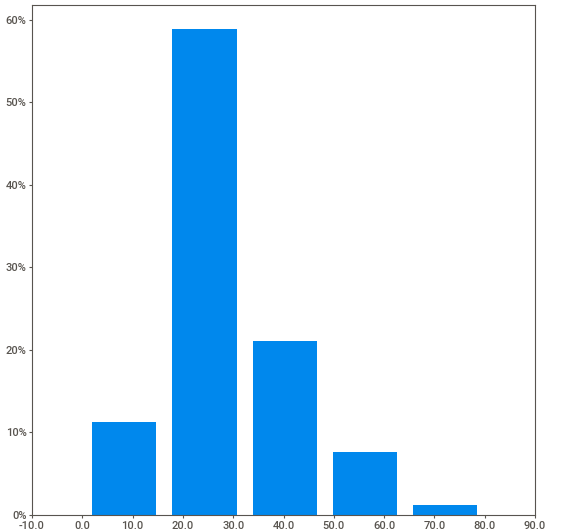
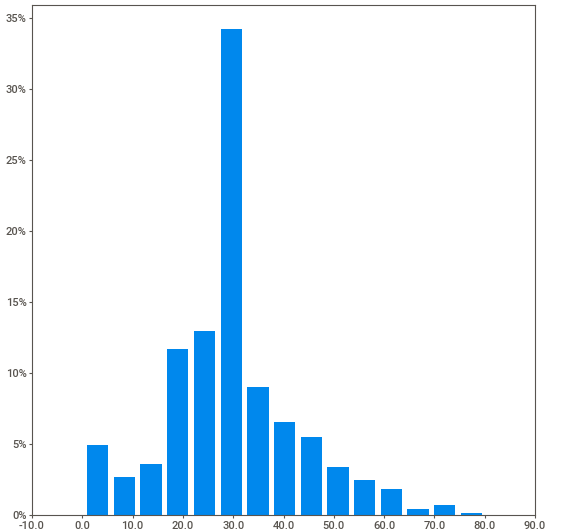
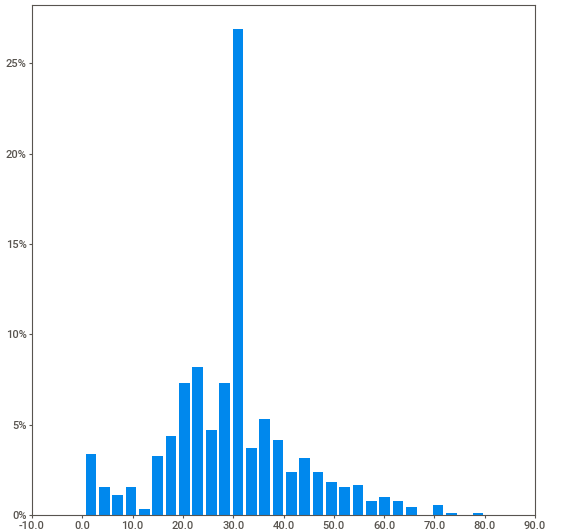
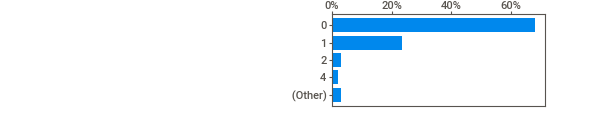
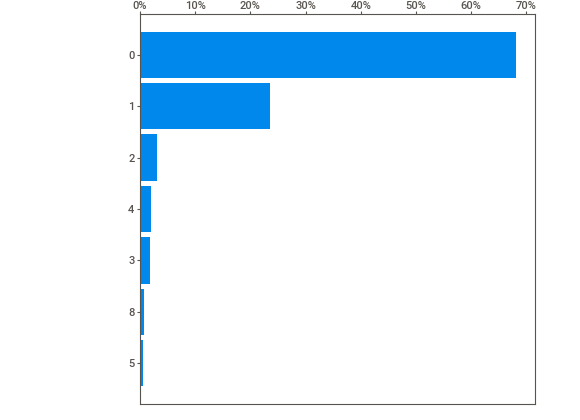
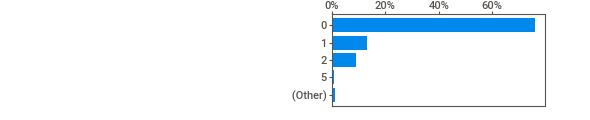
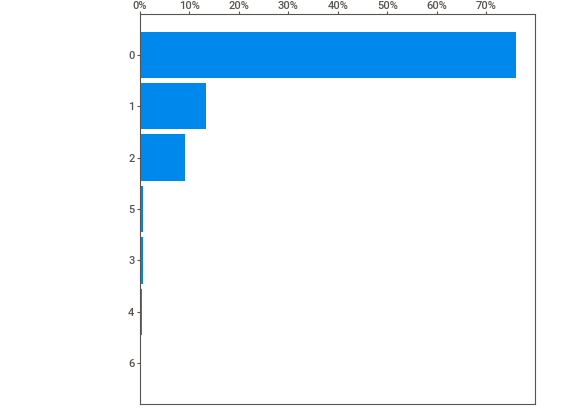
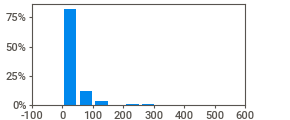
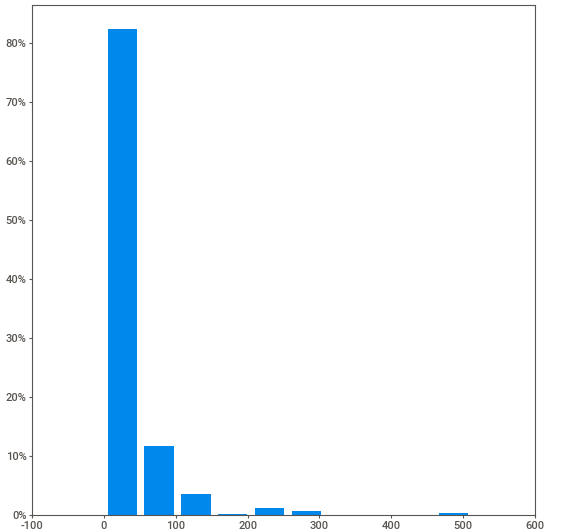
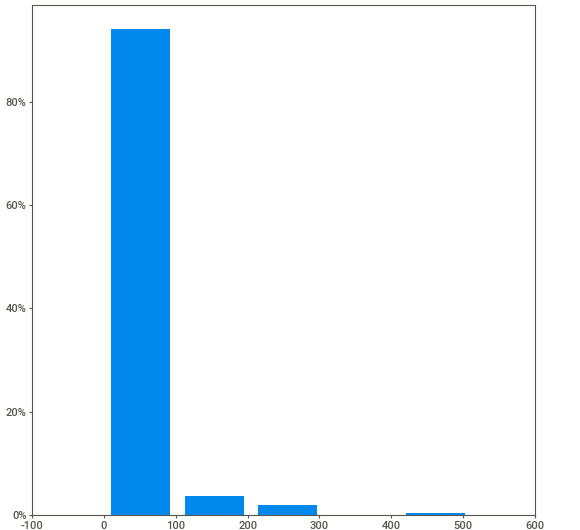
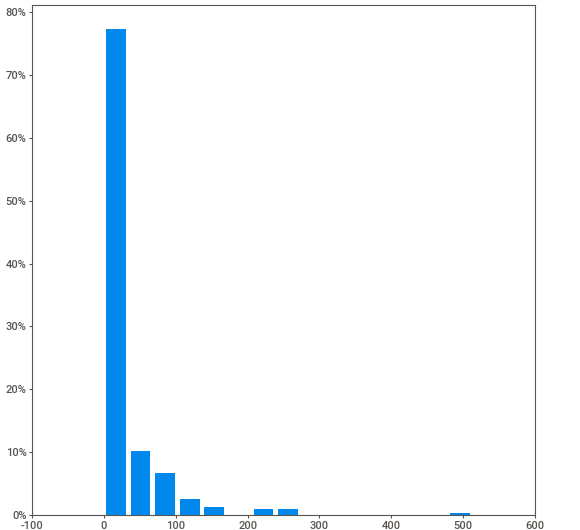
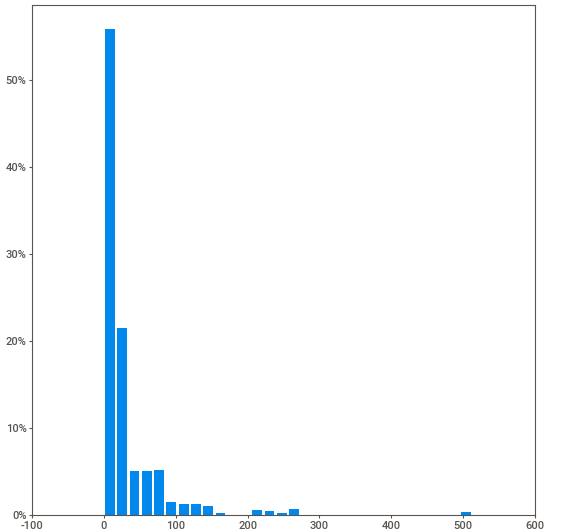
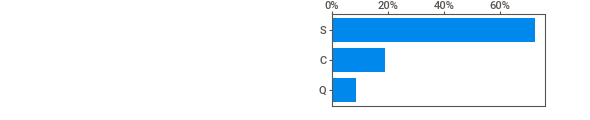
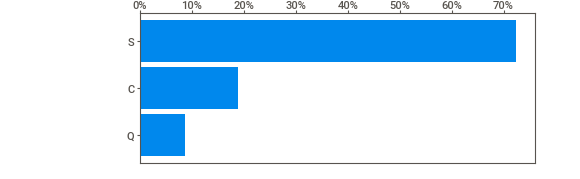
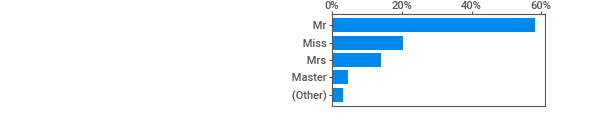
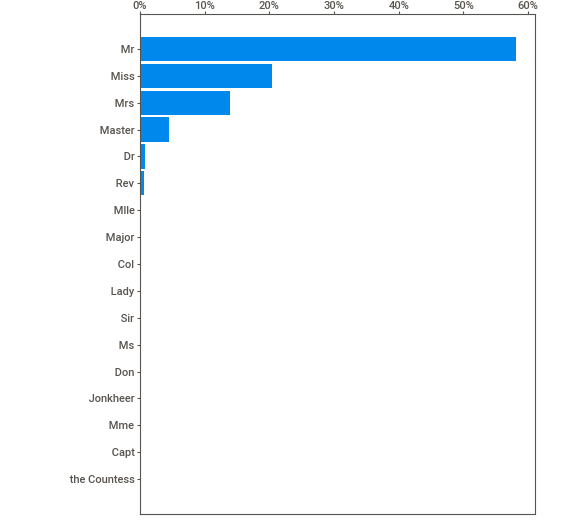
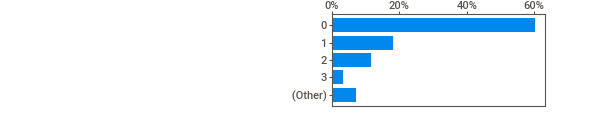
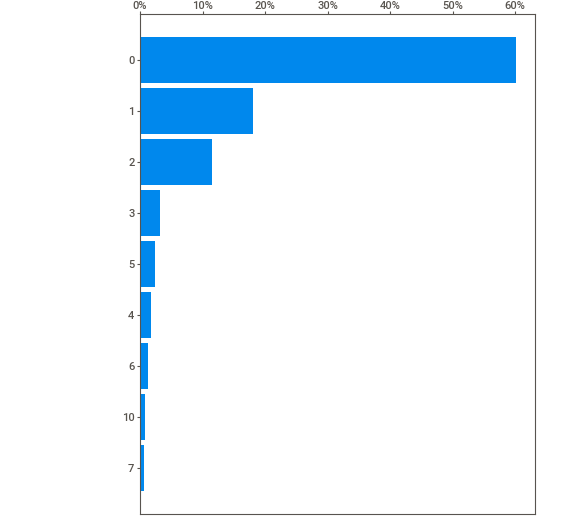
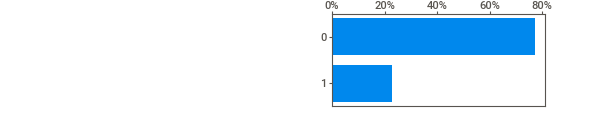
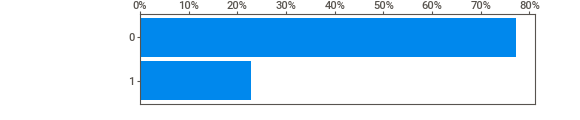
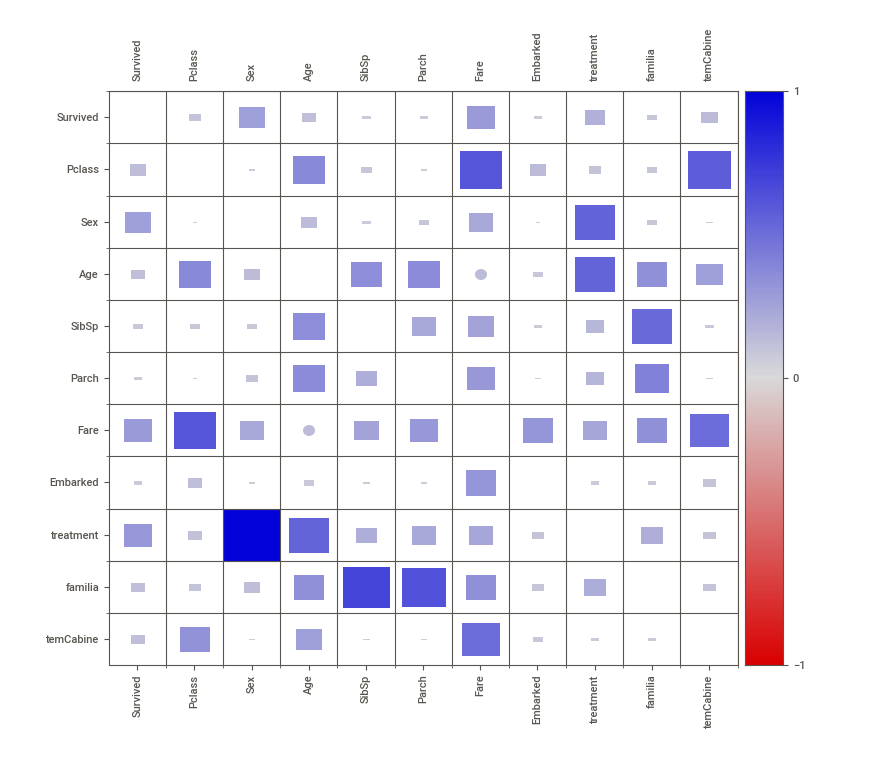
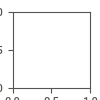

In [28]:
report = sv.analyze(df)
report.show_notebook(scale=0.7)

In [29]:
df = df.drop(columns=['SibSp',"Parch"])

In [30]:
y = df["Survived"]

X = pd.get_dummies(df.drop(columns="Survived"))
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = RandomForestClassifier(n_estimators=300, max_depth=3,random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

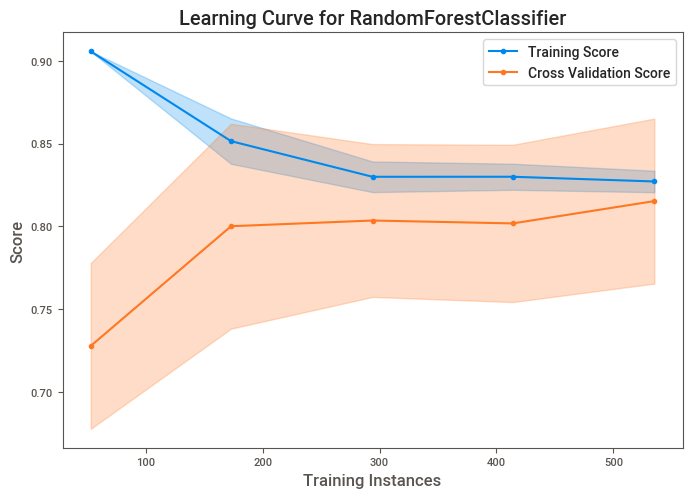

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
print(learning_curve(model, X_train, y_train, cv=10, scoring='accuracy'))

In [32]:
accuracy_score(predictions,y_test)

0.826530612244898

In [33]:
confusion_matrix = metrics.confusion_matrix(predictions, y_test)
confusion_matrix = confusion_matrix.astype(int)

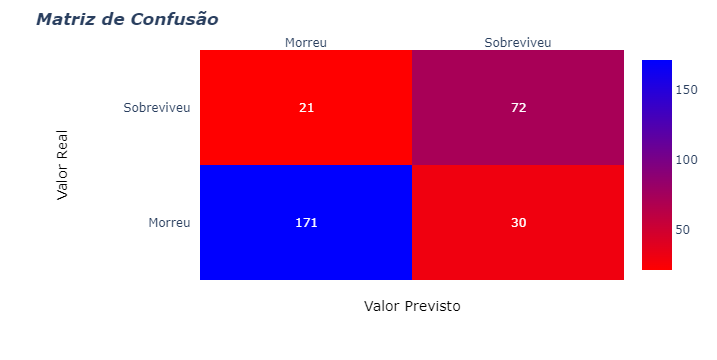

In [34]:
plot_confusion_matrix(confusion_matrix)

### Modelo em Rede Neural

In [58]:
import tensorflow as tf
def baseline_model():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(24, input_dim=8, activation='relu'))
    model.add(tf.keras.layers.Dense(24, activation='relu'))
    model.add(tf.keras.layers.Dense(24, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 24)                216       
                                                                 
 dense_14 (Dense)            (None, 24)                600       
                                                                 
 dense_15 (Dense)            (None, 24)                600       
                                                                 
 dense_16 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,treatment,familia,temCabine
0,0,3,male,22.000000,7.2500,S,Mr,1,0
1,1,1,female,38.000000,71.2833,C,Mrs,1,1
2,1,3,female,26.000000,7.9250,S,Miss,0,0
3,1,1,female,35.000000,53.1000,S,Mrs,1,1
4,0,3,male,35.000000,8.0500,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Rev,0,0
887,1,1,female,19.000000,30.0000,S,Miss,0,1
888,0,3,female,29.699118,23.4500,S,Miss,3,0
889,1,1,male,26.000000,30.0000,C,Mr,0,1


In [42]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df.Sex)
df['Embarked'] = labelencoder.fit_transform(df.Embarked)
df['treatment'] = labelencoder.fit_transform(df.treatment)


In [43]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,treatment,familia,temCabine
0,0,3,1,22.000000,7.2500,2,11,1,0
1,1,1,0,38.000000,71.2833,0,12,1,1
2,1,3,0,26.000000,7.9250,2,8,0,0
3,1,1,0,35.000000,53.1000,2,12,1,1
4,0,3,1,35.000000,8.0500,2,11,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2,14,0,0
887,1,1,0,19.000000,30.0000,2,8,0,1
888,0,3,0,29.699118,23.4500,2,8,3,0
889,1,1,1,26.000000,30.0000,0,11,0,1


In [46]:
_y = df["Survived"]

_X = df.drop(columns="Survived")
features = _X.columns

X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.33)

In [59]:
model_fit = model.fit(X_train, y_train,validation_data=(X_test,y_test), verbose=1, epochs=200)

Epoch 1/200
19/19 [==============================] - 1s 12ms/step - loss: 2.0438 - accuracy: 0.4269 - val_loss: 0.7994 - val_accuracy: 0.7041
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.6555 - val_loss: 0.6275 - val_accuracy: 0.7007
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6756 - val_loss: 0.6171 - val_accuracy: 0.6973
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6807 - val_loss: 0.5905 - val_accuracy: 0.7211
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6874 - val_loss: 0.5919 - val_accuracy: 0.7143
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.6992 - val_loss: 0.6146 - val_accuracy: 0.6803
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6992 - val_loss: 0.5819 - val_accuracy: 0.7313
Epoch 8/200


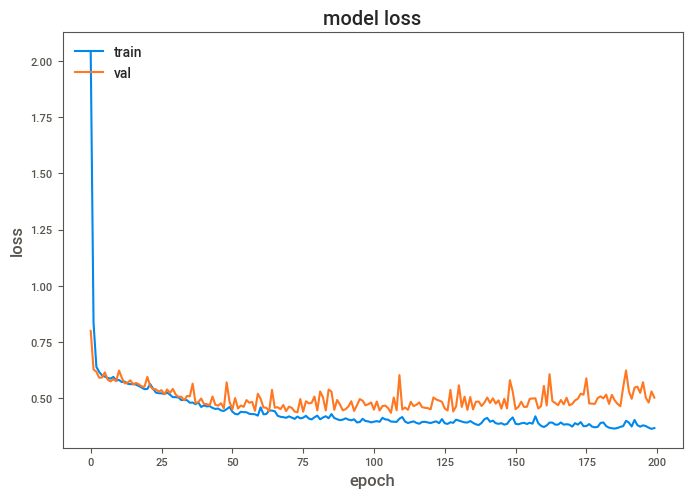

In [60]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

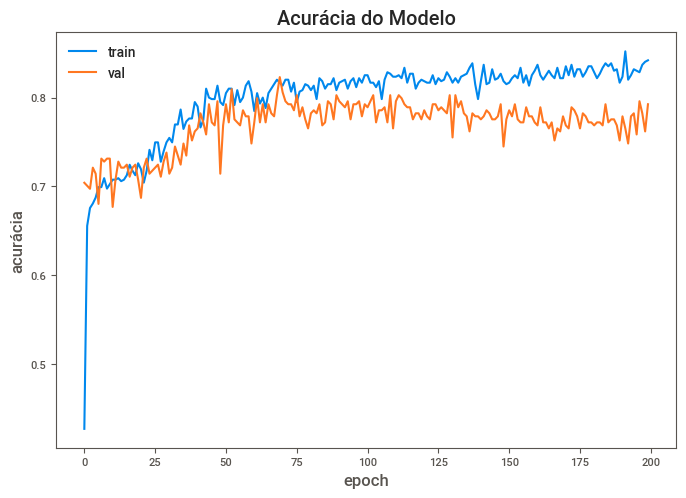

In [61]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
predictions = model.predict(X_test)

In [107]:
pred = []
for i,v in enumerate(predictions):
    pred.append((v[0]>0.5).astype(int))

In [110]:
confusion_matrix = metrics.confusion_matrix(pred, y_test)
confusion_matrix = confusion_matrix.astype(int)

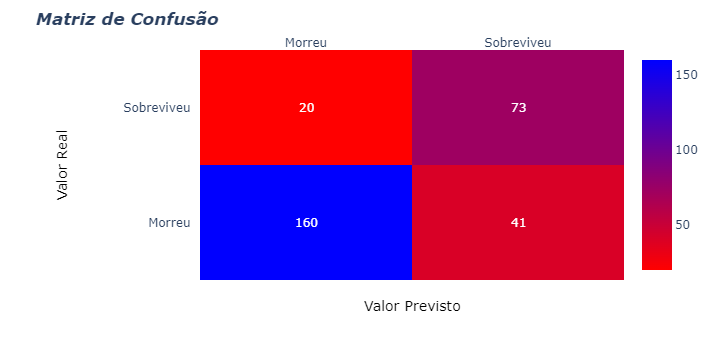

In [111]:
plot_confusion_matrix(confusion_matrix)

In [112]:
accuracy_score(pred,y_test)

0.7925170068027211

#### Testando diferentes thresholds

In [113]:
pred = []
for i,v in enumerate(predictions):
    pred.append((v[0]>0.7).astype(int))

In [114]:
confusion_matrix = metrics.confusion_matrix(pred, y_test)
confusion_matrix = confusion_matrix.astype(int)

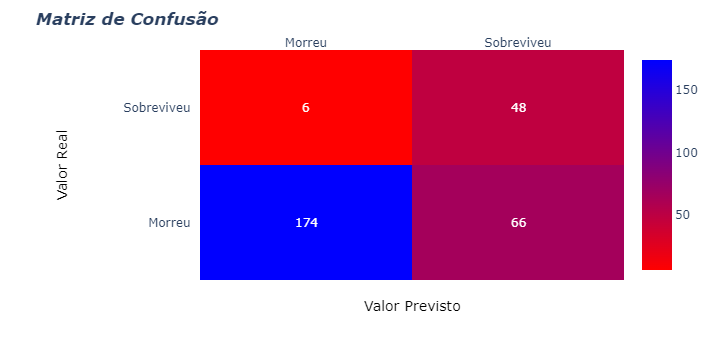

In [115]:
plot_confusion_matrix(confusion_matrix)

In [116]:
accuracy_score(pred,y_test)

0.7551020408163265

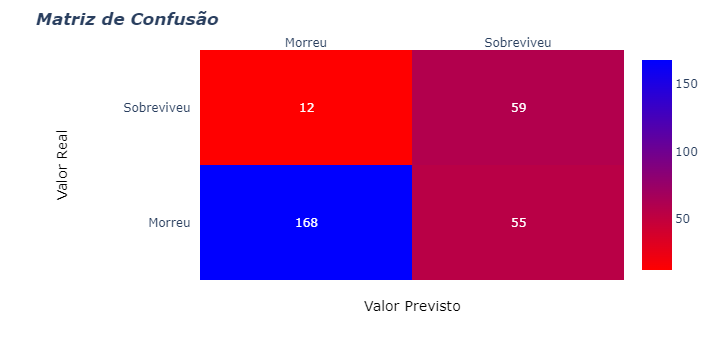

In [117]:
pred = []
for i,v in enumerate(predictions):
    pred.append((v[0]>0.6).astype(int))

confusion_matrix = metrics.confusion_matrix(pred, y_test)
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

In [118]:
accuracy_score(pred,y_test)

0.7721088435374149